In [1]:
import pandas as pd
import numpy as np 
from datetime import datetime as dt
import matplotlib .pyplot as plt

In [30]:
#import vehical_sales data set
file_path='C://python_project_analytix//case study//vehicle sale project//'
file_name='car_prices.csv'
df=pd.read_csv(file_path+file_name)
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [4]:
#change sale date column to datetime format
df['saledate']=df['saledate'].str.replace(r'\s+GMT.*', '', regex=True)
df['saledate']=pd.to_datetime(df['saledate'],errors='coerce')

In [5]:
#check null values
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           38
dtype: int64

In [6]:
#drop null values
df.dropna(inplace=True)

In [7]:
#drop unwanted column 
df.drop(columns='vin',inplace=True)

In [8]:
#check duplicates 
df.duplicated().sum()

0

In [10]:
#check how many unique values are there in each column 
df.nunique()


year                26
make                53
model              768
trim              1494
body                85
transmission         2
state               34
condition           41
odometer        160427
color               20
interior            17
seller           11923
mmr               1099
sellingprice      1806
saledate          3609
dtype: int64

                                                             MARKET TRENDS ANALYSIS 

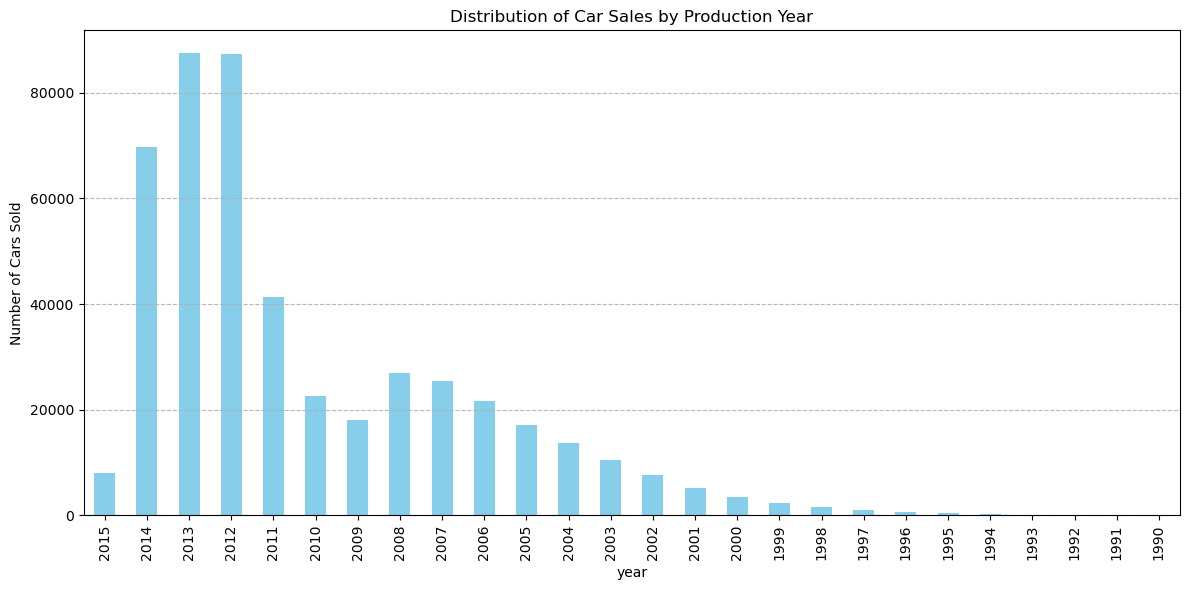

In [11]:
#Distribution of Car Sales by Production Year
yearly_distribution=df['year'].value_counts().sort_index (ascending=False)

#BAR chart for Distribution of Car Sales by Production Year
plt.figure(figsize=(12,6))
yearly_distribution.plot(kind='bar',color='skyblue')
plt.ylabel('Number of Cars Sold')
plt.title('Distribution of Car Sales by Production Year')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()

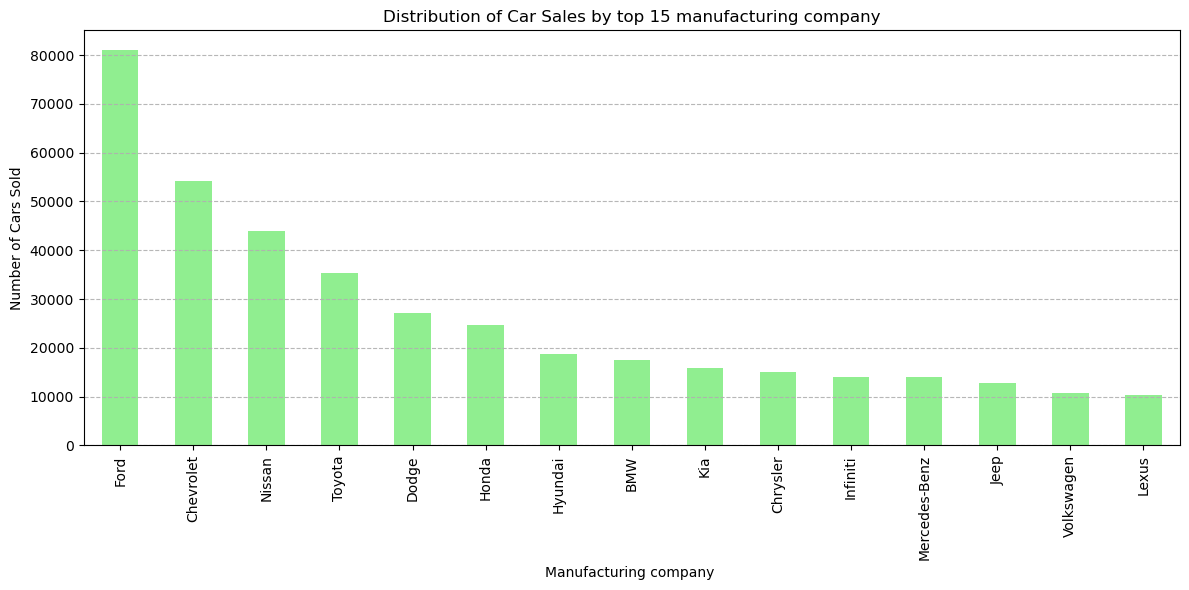

In [12]:
#Distribution of Car Sales by manufacturing company
company_wise_sales=df['make'].value_counts().head(15)

#Distribution of Car Sales by  top 10 manufacturing company
plt.figure(figsize=(12,6))
company_wise_sales.plot(kind='bar',color='lightgreen')
plt.xlabel('Manufacturing company ')
plt.ylabel('Number of Cars Sold')
plt.title('Distribution of Car Sales by top 15 manufacturing company')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()

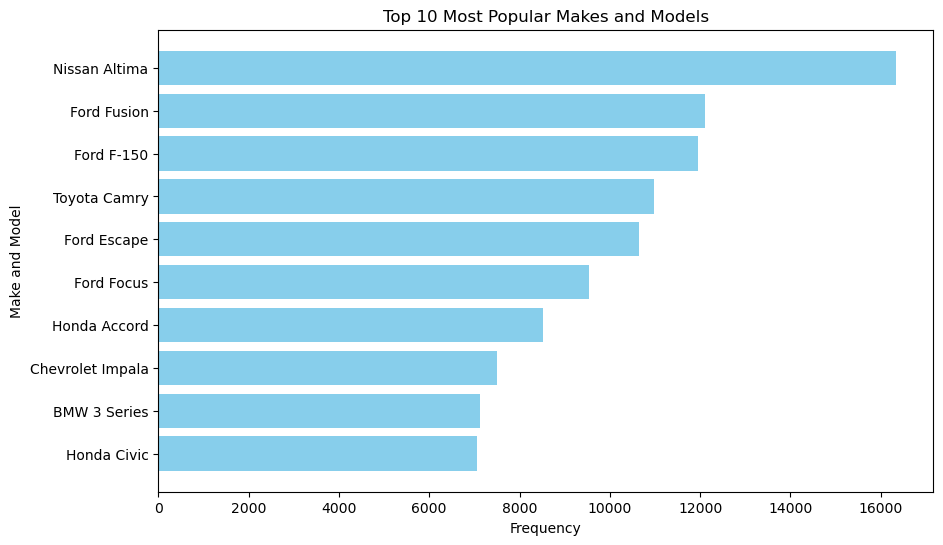

In [13]:
# Group by make and model, and count the occurrences
popular_models=df.groupby(['make','model']).size().reset_index(name='count').sort_values(by='count',ascending=False)

#Top 10 models 
top_10_models=popular_models.head(10)
top_10_models

# Create a bar plot to visualize the top 10 most popular makes and models
plt.figure(figsize=(10,6))
plt.barh(top_10_models['make']+ ' ' +top_10_models['model'], top_10_models['count'],color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Make and Model')
plt.title('Top 10 Most Popular Makes and Models')
plt.gca().invert_yaxis()
plt.show()

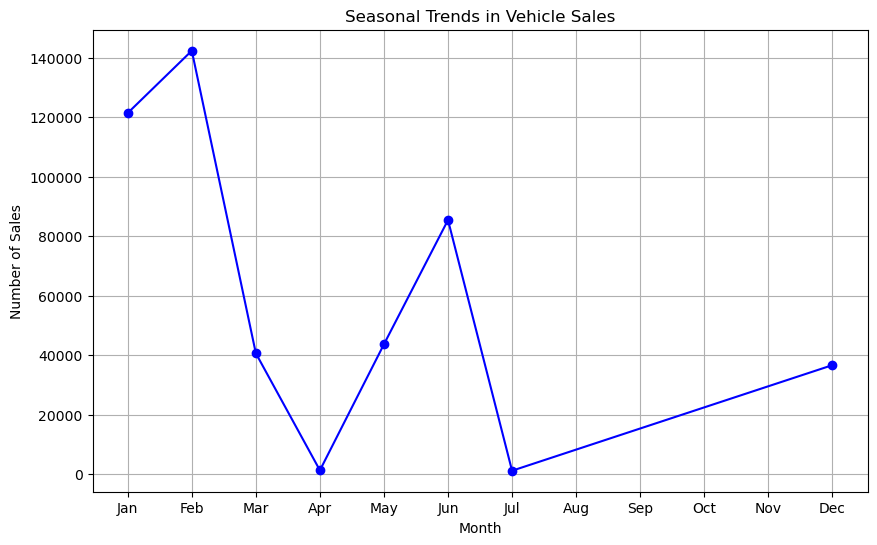

In [14]:
#seasonal trends in vehicle sales
monthly_sales=df.groupby(df['saledate'].dt.month).size()

#Create a line plot to visualize the seasonal trends in vehicle sales
plt.figure(figsize=(10,6))
monthly_sales.plot(kind='line',marker='o',color='blue')
plt.title('Seasonal Trends in Vehicle Sales')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

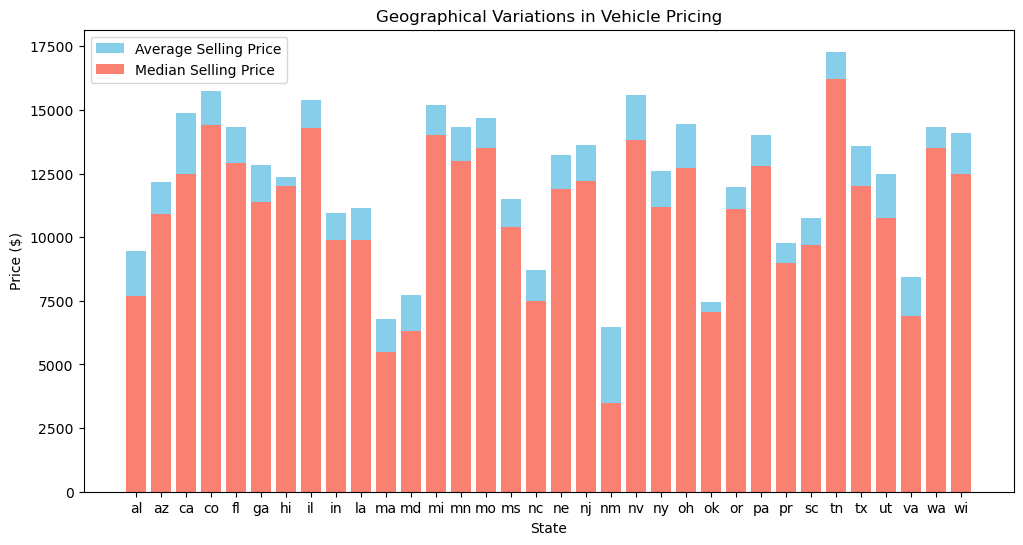

In [15]:
# Group by state and calculate aggregate metrics
state_prices = df.groupby('state')['sellingprice'].agg(['mean', 'median']).reset_index()

# Visualize the differences in average selling price across states using a bar plot
plt.figure(figsize=(12, 6))
plt.bar(state_prices['state'], state_prices['mean'], color='skyblue', label='Average Selling Price')
plt.bar(state_prices['state'], state_prices['median'], color='salmon', label='Median Selling Price')
plt.title('Geographical Variations in Vehicle Pricing')
plt.xlabel('State')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

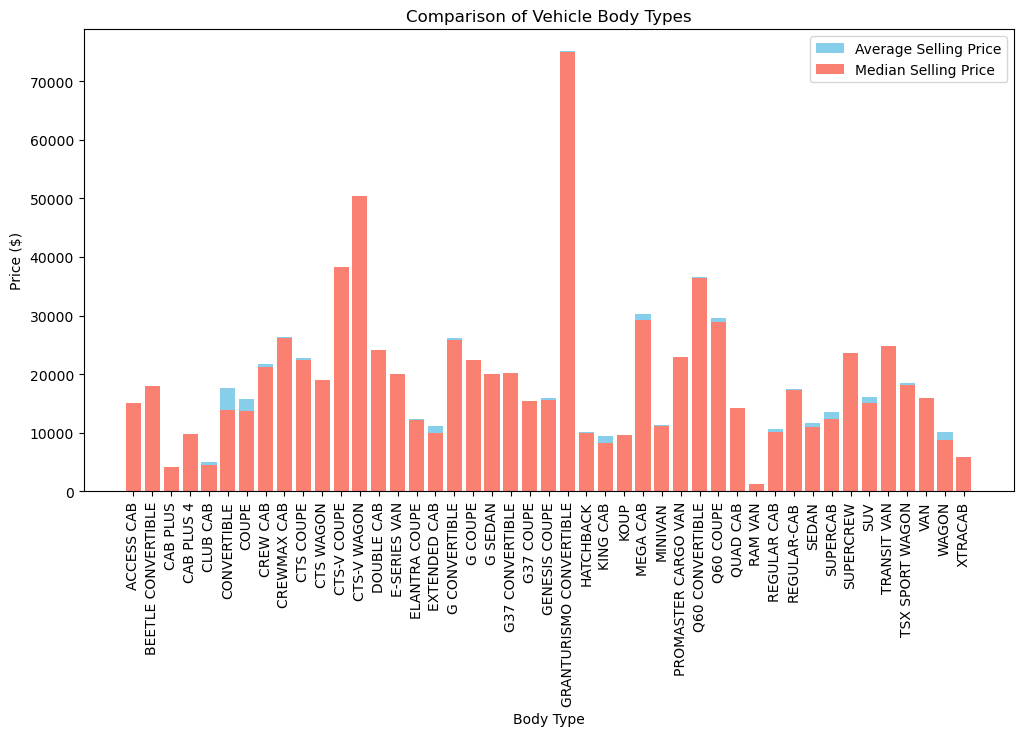

In [16]:
#Comparison of Vehicle Body Types
df['body']=df['body'].str.upper()
body_prices=df.groupby(['body'])['sellingprice'].agg(['mean', 'median']).reset_index()

# Visualize the differences in average selling price across body types using a bar plot
plt.figure(figsize=(12, 6))
plt.bar(body_prices['body'], body_prices['mean'], color='skyblue', label='Average Selling Price')
plt.bar(body_prices['body'], body_prices['median'], color='salmon', label='Median Selling Price')
plt.title('Comparison of Vehicle Body Types')
plt.xlabel('Body Type')
plt.ylabel('Price ($)')
plt.legend()
plt.xticks(rotation=90)  
plt.show()

                                                            SELLER ANALYSIS

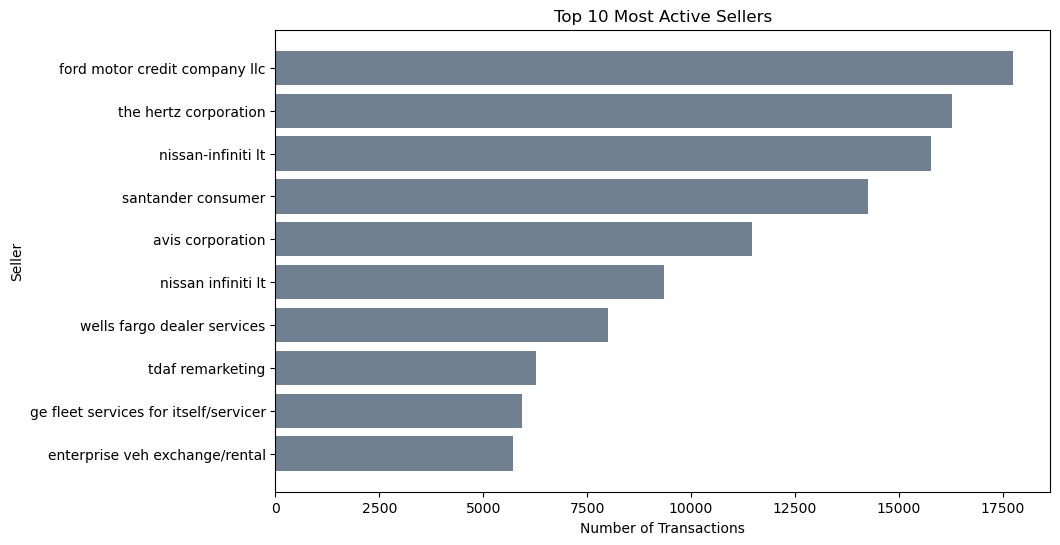

In [17]:
#Top sellers
top_10_sellers=df.groupby(['seller']).size().reset_index(name='no_of_transaction').sort_values(by='no_of_transaction',ascending=False).head(10)

#  Visualize the distribution of transaction counts across sellers
plt.figure(figsize=(10, 6))
plt.barh(top_10_sellers['seller'],top_10_sellers['no_of_transaction'],color='slategrey')

plt.title('Top 10 Most Active Sellers')
plt.xlabel('Number of Transactions')
plt.ylabel('Seller')
plt.gca().invert_yaxis()
plt.show()